In [1]:
import os
import tarfile
from importlib import resources

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.utils import Bunch

In [2]:
def load_california(data_root, archive_path):
    with tarfile.open(mode="r:gz", name=os.path.join(data_root, archive_path)) as f:
        cal_housing = np.loadtxt(
            f.extractfile(
                os.path.join("CaliforniaHousing", "cal_housing.data")
            ),
            delimiter=","
        )

    descr_path = resources.files("sklearn.datasets.descr") / "california_housing.rst"
    descr = descr_path.read_text(encoding="utf-8")
    
    columns_index = [8, 7, 2, 3, 4, 5, 6, 1, 0]
    cal_housing = cal_housing[:, columns_index]

    feature_names = [
        "MedInc",
        "HouseAge",
        "AveRooms",
        "AveBedrms",
        "Population",
        "AveOccup",
        "Latitude",
        "Longitude",
    ]

    target_names = [
        "MedHouseVal",
    ]

    target, data = cal_housing[:, 0], cal_housing[:, 1:]
    data[:, 2] /= data[:, 5]
    data[:, 3] /= data[:, 5]
    data[:, 5] = data[:, 4] / data[:, 5]
    target = target / 100_000.0

    X = data
    y = target
    
    data_df = pd.DataFrame(X, columns=feature_names)
    target_df = pd.DataFrame(y, columns=target_names)
    frame = pd.concat([data_df, target_df], axis=1)
    
    return Bunch(
        data=X,
        target=y,
        frame=frame,
        target_names=target_names,
        feature_names=feature_names,
        DESCR=descr,
    )

In [3]:
housing = load_california(data_root="data", archive_path="california-housing.tgz")
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

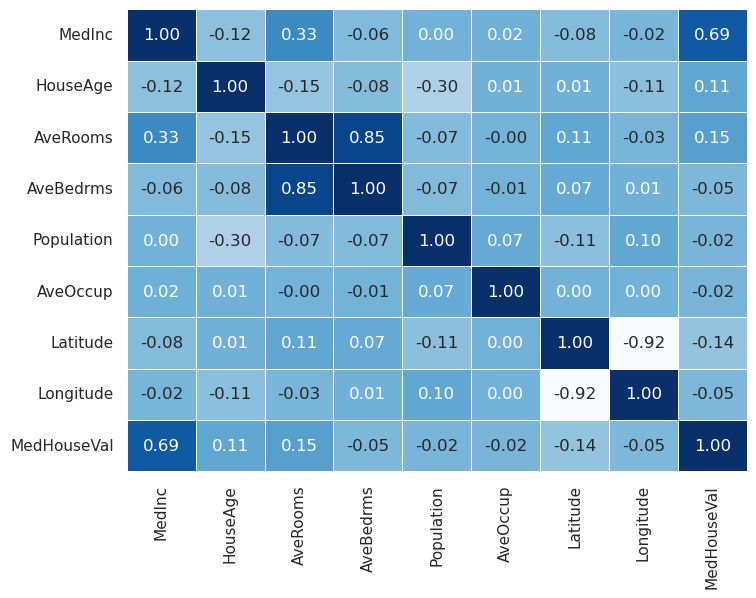

In [4]:
sns.set(style="white")
corr = housing.frame.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="Blues", linewidth=.5, cbar=False, fmt=".2f")
plt.show()

## Linear Regression

In [5]:
X = housing.frame["MedInc"].values.reshape(-1, 1)
y = housing.frame["MedHouseVal"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"Coefficients: {lin_reg.coef_}")

MSE: 0.7028
Coefficients: [[0.41731856]]


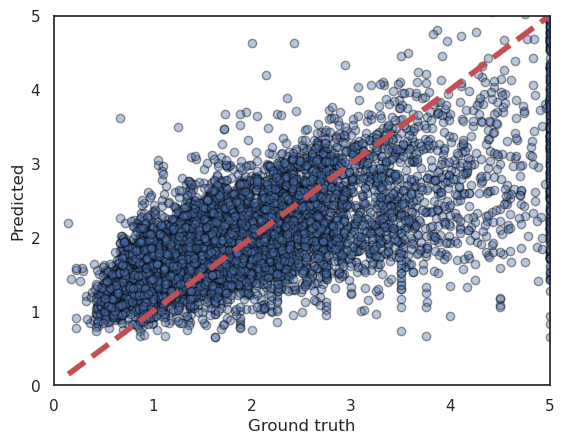

In [6]:
fig, ax = plt.subplots()
plt.scatter(y_test, y_pred, edgecolors="black", alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=4)
plt.xlabel("Ground truth")
plt.ylabel("Predicted")
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()

In [7]:
X = housing.frame[["MedInc", "AveRooms", "Latitude"]].values
y = housing.frame["MedHouseVal"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"Coefficients: {lin_reg.coef_}")

MSE: 0.6851
Coefficients: [[ 0.42682965 -0.03155663 -0.04311346]]


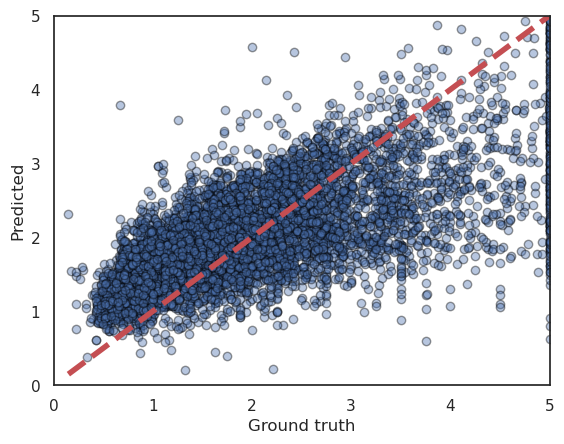

In [8]:
fig, ax = plt.subplots()
plt.scatter(y_test, y_pred, edgecolors="black", alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=4)
plt.xlabel("Ground truth")
plt.ylabel("Predicted")
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()

In [10]:
X = housing.frame
X = X.drop(["MedHouseVal"], axis=1)
X = X.values
y = housing.frame["MedHouseVal"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"Coefficients: {lin_reg.coef_}")

MSE: 0.5370
Coefficients: [[ 4.44870466e-01  9.55004561e-03 -1.21991503e-01  7.79144696e-01
  -7.68990808e-08 -3.29948505e-03 -4.19131153e-01 -4.34103468e-01]]


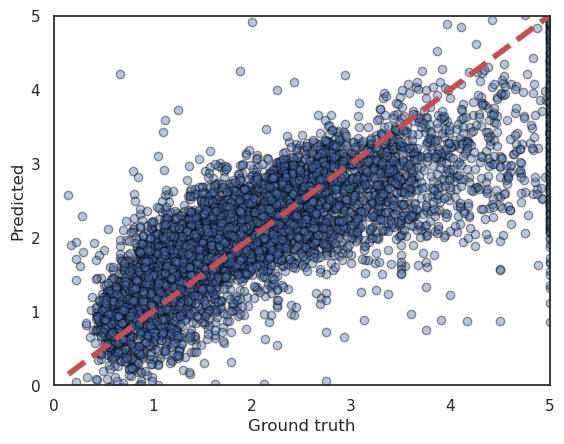

In [11]:
fig, ax = plt.subplots()
plt.scatter(y_test, y_pred, edgecolors="black", alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=4)
plt.xlabel("Ground truth")
plt.ylabel("Predicted")
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()

## K-Nearest Neighbors

In [12]:
X = housing.frame
X = X.drop(["MedHouseVal"], axis=1)
X = X.values
y = housing.frame["MedHouseVal"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"Coefficients: {lin_reg.coef_}")

MSE: 1.1594
Coefficients: [[ 4.44870466e-01  9.55004561e-03 -1.21991503e-01  7.79144696e-01
  -7.68990808e-08 -3.29948505e-03 -4.19131153e-01 -4.34103468e-01]]


## Elbow Method

In [14]:
X = housing.frame
X = X.drop(["MedHouseVal"], axis=1)
X = X.values
y = housing.frame["MedHouseVal"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
mse = []
n_neighbors = list(range(1, 51))
for n in n_neighbors:
    knn_reg = KNeighborsRegressor(n_neighbors=n, n_jobs=-1)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))

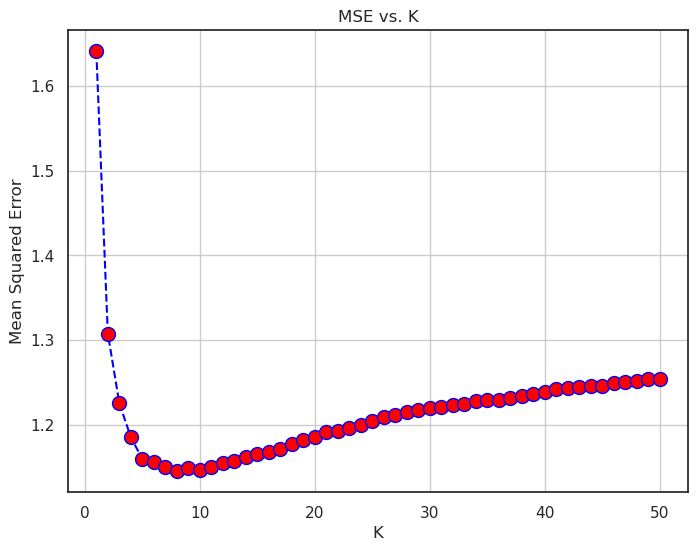

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors, mse, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("MSE vs. K")
plt.xlabel("K")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

In [17]:
print(f"Lowest mean squared error: {min(mse)}")
print(f"K for lowest MSE: {mse.index(min(mse)) + 1}")

Lowest mean squared error: 1.1448551836181742
K for lowest MSE: 8
